IRIS CLASSIFICATION

In [1]:
import sklearn
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow import keras
warnings.filterwarnings('ignore')

In [17]:
!pip install scikit-learn==1.3.0

LOADING THE DATASET

In [18]:
#load the csv data
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
#display basic stats of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
#display no of samples on each class
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [23]:
#cheack  null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

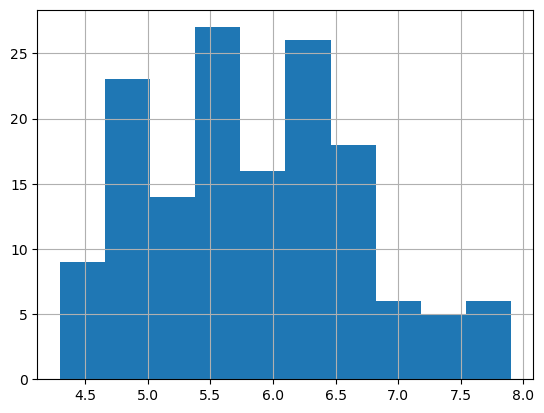

In [24]:
df['sepal_length'].hist()

<Axes: >

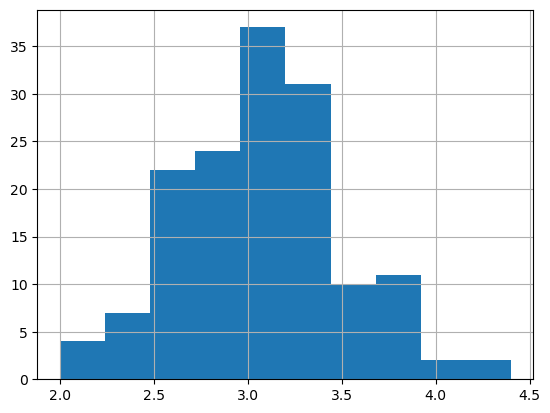

In [25]:
df['sepal_width'].hist()

<Axes: >

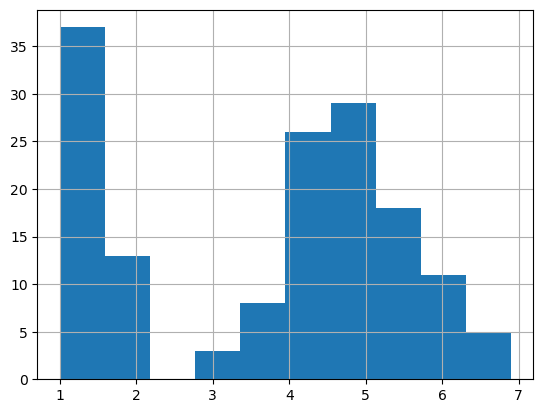

In [26]:
df['petal_length'].hist()

<Axes: >

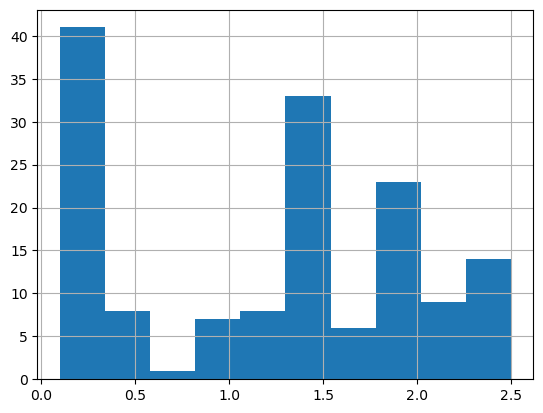

In [27]:
df['petal_width'].hist()

In [28]:
#create list of colors and class labels
colors=['red','orange','blue']
species=['virginica','versicolor','setosa']

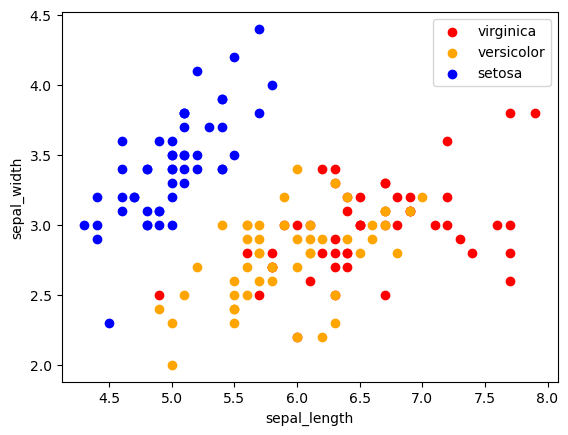

In [29]:
for i in range(3):
    #filter data on each class
    x=df[df['species']==species[i]]
    #plot the scatter plot
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

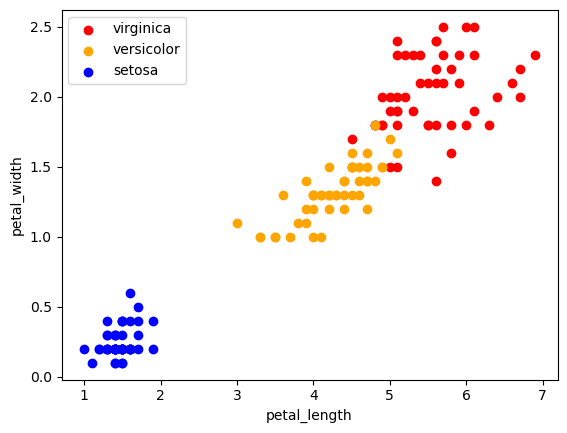

In [30]:
for i in range(3):
    #filter data on each class
    x=df[df['species']==species[i]]
    #plot the scatter plot
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

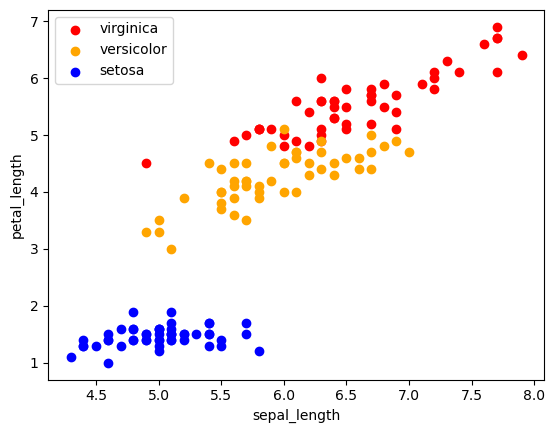

In [31]:
for i in range(3):
    #filter data on each class
    x=df[df['species']==species[i]]
    #plot the scatter plot
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

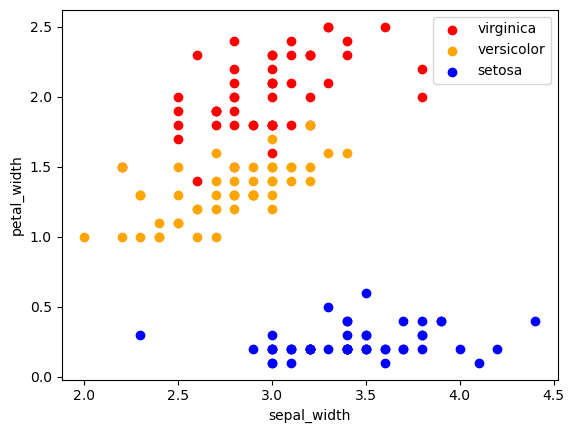

In [33]:
for i in range(3):
    #filter data on each class
    x=df[df['species']==species[i]]
    #plot the scatter plot
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

CORRELATION MATRIX

LABEL ENCODER

In [34]:
#from sklearn  preprocessing import label encoder
#le=labelencoder()
#transform the string labels to integer
#df['Species']=le.fit_transform(df['Species'])
#df.head()

MODEL TRAINING AND TESTING

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

# input data
x=df.drop(columns=['species'])
# output data
y=df['species']
# split the data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [36]:
# Logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy:",model.score(x_test,y_test)*100)

Logistic Regression Accuracy: 97.77777777777777


In [37]:
#model training
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [38]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [39]:
# K-Nearest neighbors
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("K-nearest neighbors Accuracy:",model.score(x_test,y_test)*100)

K-nearest neighbors Accuracy: 97.77777777777777


In [40]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [41]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [42]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("Decision Tree Accuracy:",model.score(x_test,y_test)*100)

Decision Tree Accuracy: 95.55555555555556


In [43]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [44]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [45]:
#save the model
import pickle
filename='saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [46]:
import pickle
# save the upadate model
filename='saved_model.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(model,file)
    print("model saved successfully.")
except exception as e:
    print(f"Error saving the model:{e}")

model saved successfully.
